In [43]:
import pandas as pd
import numpy as np
from scipy.stats import shapiro, fligner, ttest_ind

In [2]:
# Recursos:
# Comparación de media (t-test)
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html
# https://towardsdatascience.com/inferential-statistics-series-t-test-using-numpy-2718f8f9bf2f

# Comprobación de normalidad
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html

# Comparación de homocedasticidad
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.fligner.html
# https://docs.scipy.org/doc/scipy-0.19.1/reference/generated/scipy.stats.fligner.html

# Comparaciones de distr no parametricos
# https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.wilcoxon.html
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html

In [57]:
df = pd.read_csv('train.csv')
# df2 = pd.read_csv('test.csv')
# df.append(df2, sort=False)

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Test de normalidad

Para comprobar la normalidad de las variables numéricas Age y Fare aplicaremos el test Shapiro-Wilk. La hipótesis nula es que la variable sigue una distribución normal. El nivel de significancia será $\alpha = 0.05$, si el p-valor es inferior a este, rechazaremos la hipótesis nula.

In [5]:
# test Saphiro Wilk para comprobar la normalidad de Age
print("Nº de observaciones:",  len(df['Age'].dropna()))
shapiro(df['Age'].dropna())

Nº de observaciones: 714


(0.9814548492431641, 7.322165629375377e-08)

In [6]:
# test Saphiro Wilk para comprobar la normalidad de Fare
print("Nº de observaciones:",  len(df['Fare'].dropna()))
shapiro(df['Fare'].dropna())

Nº de observaciones: 891


(0.5218914747238159, 1.0789998175301091e-43)

Ninguna de las dos variables estudiadas sigue una distribución normal. Sin embargo, dado que tenemos un gran número de observaciones (N = (714, 891) > 20) podemos asumir el teorema central del límite. La distribución de la media de las variables estudidas, gracias a la gran cantidad de observaciones, seguirá una distribución normal con una media de población $\mu$ y una varianza $\frac{\sigma^2}{N}$.

#  Test de homocedasticidad

Para comprobar la homocedasticidad de las variables usaremos el test de Fligner-Killeen, dado que nuestros datos no siguen una distribución normal. La hipótesis nula asume igualdad de varianza.

In [7]:
sobrevive = df['Survived'] == 1
nop = df['Survived'] == 0

hombre = df['Sex'] == 'male'
mujer = df['Sex'] == 'female'

niño = df['Age'] <= 12
adolescente = (df['Age'] > 12) & (df['Age'] < 18)
adulto = df['Age'] >= 18

primera = df['Pclass'] == 1
segunda = df['Pclass'] == 2
tercera = df['Pclass'] == 3

In [8]:
edadvssupervivencia = [df.loc[sobrevive, 'Age'].dropna() , df.loc[nop, 'Age'].dropna()]
edadvsclase = [df.loc[primera, 'Age'].dropna() , df.loc[segunda, 'Age'].dropna(), df.loc[tercera, 'Age'].dropna()]

In [9]:
billetevssupervivencia = [df.loc[sobrevive, 'Fare'].dropna() , df.loc[nop, 'Fare'].dropna()]
billetevsclase = [df.loc[primera, 'Fare'].dropna() , df.loc[segunda, 'Fare'].dropna(), df.loc[tercera, 'Fare'].dropna()]

In [10]:
fligner(*edadvssupervivencia)

FlignerResult(statistic=1.0436060696132083, pvalue=0.3069842761053375)

In [11]:
fligner(*edadvsclase)

FlignerResult(statistic=11.317210079614878, pvalue=0.0034873782605697604)

In [12]:
fligner(*billetevssupervivencia)

FlignerResult(statistic=96.2527395111909, pvalue=1.0111515793725321e-22)

In [13]:
fligner(*billetevsclase)

FlignerResult(statistic=365.7983079876698, pvalue=3.697487170015036e-80)

Todos los casos tienen pvalues > 0.05 por lo que podemos asumir homocedasticidad para todos los casos.

# Análisis estadístico

##  Comparación de medias (t-test)

$H_0: \mu_1 = \mu_2 $

In [14]:
# Edad supervivientes vs no
ttest_ind(*edadvssupervivencia)

Ttest_indResult(statistic=-2.06668694625381, pvalue=0.03912465401348249)

In [15]:
# Edad 1era clase vs 2da clase
ttest_ind(edadvsclase[0], edadvsclase[1])

Ttest_indResult(statistic=5.485187676773201, pvalue=7.835568991415144e-08)

In [16]:
# Edad 2da clase vs 3ra clase
ttest_ind(edadvsclase[1], edadvsclase[2])

Ttest_indResult(statistic=3.927800191020872, pvalue=9.715078600777852e-05)

In [17]:
# Edad 1era clase vs 3ra clase
ttest_ind(edadvsclase[0], edadvsclase[2])

Ttest_indResult(statistic=10.849122601201033, pvalue=6.134470007830625e-25)

In [18]:
# Billete supervivientes vs no
ttest_ind(*billetevssupervivencia)

Ttest_indResult(statistic=7.939191660871055, pvalue=6.120189341924198e-15)

In [19]:
# Billete 1ra clase vs 2da clase
ttest_ind(billetevsclase[0], billetevsclase[1])

Ttest_indResult(statistic=10.851594207309702, pvalue=3.303644173119574e-24)

In [20]:
# Billete 2da clase vs 3ra clase
ttest_ind(billetevsclase[1], billetevsclase[2])

Ttest_indResult(statistic=6.600620525446866, pvalue=8.304239675888693e-11)

In [21]:
# Billete 1ra clase vs 3ra clase
ttest_ind(billetevsclase[0], billetevsclase[2])

Ttest_indResult(statistic=19.448650285047485, pvalue=8.908959353672071e-68)

##  Wilcox o Mann-Whitney

In [22]:
# revisar apuntes estadística avanzada ->¿test previo para decidir uno ub otro? ¿Eran datos apareados?

# Correlación

In [68]:
df[['Age', 'Fare']].corr()

,Age,Fare
Age,1.000000,0.096067
Fare,0.096067,1.000000


#  Camparación de más de dos grupos - ANOVA

In [23]:
# https://ariepratama.github.io/How-to-Use-1-Way-Anova-in-Python/
# https://www.marsja.se/four-ways-to-conduct-one-way-anovas-using-python/
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html

In [24]:
# df[['Survived', 'Pclass']] = df[['Survived', 'Pclass']].astype('category')

In [25]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

Comapararemos si hay diferencia entre la edad media de los supervivientes frente a los no, según sexo, clase y ¿sexo y clase (anova multivariante)?

WIP: $H_0: \mu_1 = \mu_2 = \mu_3 $

In [26]:
mod = ols('Age ~ Survived', data=df.loc[hombre, ['Age', 'Survived', 'Pclass']]).fit()
# do type 2 anova
aov_table = sm.stats.anova_lm(mod, typ=2)
print('ANOVA table for Male')
print('----------------------')
print(aov_table)
print()

mod = ols('Age ~ Survived', data=df.loc[mujer, ['Age', 'Survived', 'Pclass']]).fit()
# do type 2 anova
aov_table = sm.stats.anova_lm(mod, typ=2)
print('ANOVA table for Female')
print('----------------------')
print(aov_table)

ANOVA table for Male
----------------------
                sum_sq     df        F    PR(>F)
Survived   1393.393233    1.0  6.54674  0.010833
Residual  95989.816667  451.0      NaN       NaN

ANOVA table for Female
----------------------
                sum_sq     df         F    PR(>F)
Survived    697.854747    1.0  3.539346  0.061051
Residual  51067.165847  259.0       NaN       NaN


In [27]:
mod = ols('Age ~ Pclass', data=df.loc[hombre, ['Age', 'Survived', 'Pclass']]).fit()
# do type 2 anova
aov_table = sm.stats.anova_lm(mod, typ=2)
print('ANOVA table for Male')
print('----------------------')
print(aov_table)
print()

mod = ols('Age ~ Pclass', data=df.loc[mujer, ['Age', 'Survived', 'Pclass']]).fit()
# do type 2 anova
aov_table = sm.stats.anova_lm(mod, typ=2)
print('ANOVA table for Female')
print('----------------------')
print(aov_table)

ANOVA table for Male
----------------------
                sum_sq     df          F        PR(>F)
Pclass    15755.188014    2.0  43.427701  5.687443e-18
Residual  81628.021886  450.0        NaN           NaN

ANOVA table for Female
----------------------
                sum_sq     df         F        PR(>F)
Pclass     7737.011413    2.0  22.66908  8.518297e-10
Residual  44028.009181  258.0       NaN           NaN


In [28]:
mod = ols('Age ~ Survived * Pclass', data=df.loc[hombre, ['Age', 'Survived', 'Pclass']]).fit()
# do type 2 anova
aov_table = sm.stats.anova_lm(mod, typ=2)
print('ANOVA table for Male')
print('----------------------')
print(aov_table)
print()

mod = ols('Age ~ Survived * Pclass', data=df.loc[mujer, ['Age', 'Survived', 'Pclass']]).fit()
# do type 2 anova
aov_table = sm.stats.anova_lm(mod, typ=2)
print('ANOVA table for Female')
print('----------------------')
print(aov_table)

ANOVA table for Male
----------------------
                       sum_sq     df          F        PR(>F)
Survived          4912.977666    1.0  29.157399  1.085901e-07
Pclass           19274.772447    2.0  57.195683  7.635560e-23
Survived:Pclass   1396.219493    2.0   4.143122  1.648691e-02
Residual         75318.824727  447.0        NaN           NaN

ANOVA table for Female
----------------------
                       sum_sq     df          F        PR(>F)
Survived           505.183119    1.0   3.001237  8.441008e-02
Pclass            7544.339785    2.0  22.410046  1.081756e-09
Survived:Pclass    599.964010    2.0   1.782160  1.703637e-01
Residual         42922.862052  255.0        NaN           NaN


In [29]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison
# for female
# compare the age between survived , using 95% confidence interval 
mc = MultiComparison(df.loc[mujer, 'Age'].array, df.loc[mujer, 'Survived'].astype(int).array)

In [30]:
# tukey_result = mc.tukeyhsd(alpha=0.05)

# print(tukey_result)
# print('Unique diet groups: {}'.format(mc.groupsunique))

# Visualización

In [32]:
import seaborn as sns
from matplotlib import pyplot as plt
plt.style.use('ggplot')

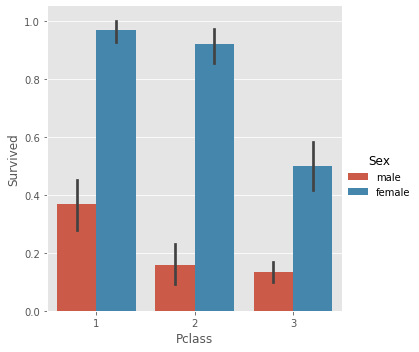

In [60]:
sns.catplot(x="Pclass", y="Survived", hue="Sex", kind="bar", data=df);

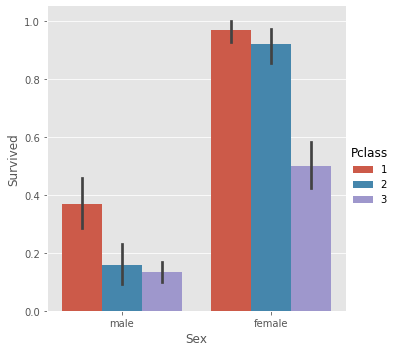

In [61]:
sns.catplot(x="Sex", y="Survived", hue="Pclass", kind="bar", data=df);

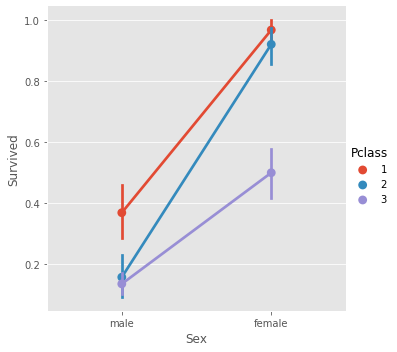

In [37]:
sns.catplot(x="Sex", y="Survived", hue="Pclass", kind="point", data=df);

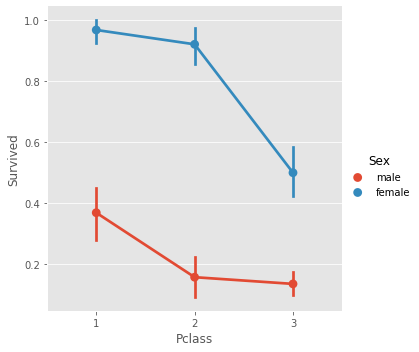

In [40]:
sns.catplot(x="Pclass", y="Survived", hue="Sex",
            kind="point", data=df);

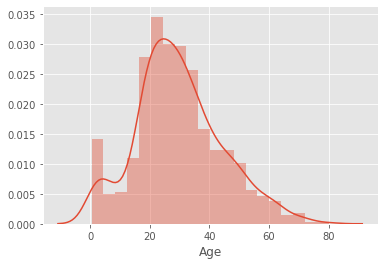

In [67]:
sns.distplot(df['Age'].dropna());

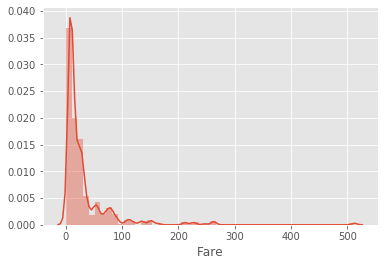

In [65]:
sns.distplot(df['Fare']);

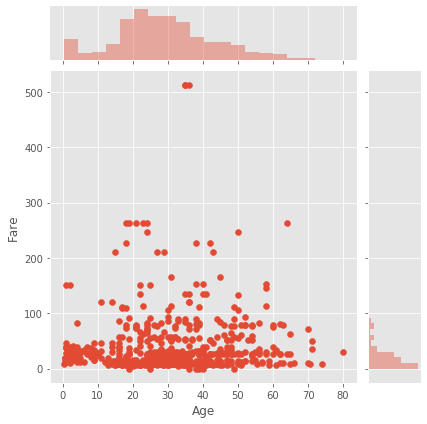

In [63]:
sns.jointplot(x="Age", y="Fare", data=df);

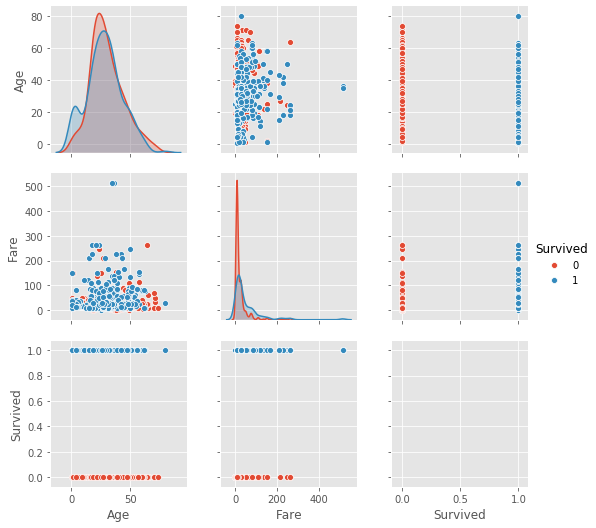

In [73]:
sns.pairplot(df[['Age', 'Fare', 'Survived']].dropna(), hue="Survived");

In [79]:
df['Age'].dropna().describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [77]:
714/10

71.4

In [85]:
df['Agecat'] = pd.cut(df['Age'].dropna(), 5)

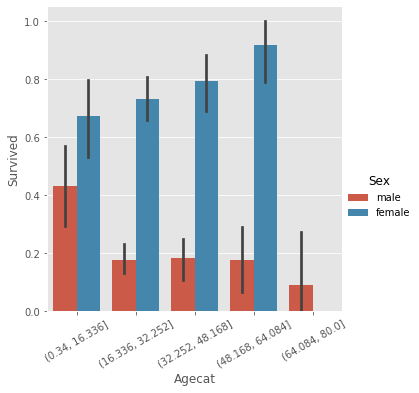

In [95]:
ax = sns.catplot(x="Agecat", y="Survived", hue="Sex", kind="bar", data=df)
ax.set_xticklabels(rotation=30);

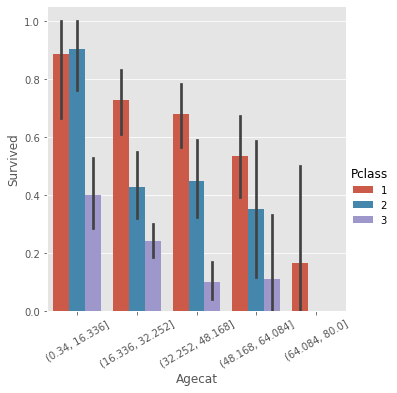

In [94]:
ax = sns.catplot(x="Agecat", y="Survived", hue="Pclass", kind="bar", data=df)
ax.set_xticklabels(rotation=30);